In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator as rgi
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from initial_conditions import Domain, Heaviside, LinearRamp, SmoothRamp, Sigmoid, CkRamp
from basis_functions import SVD, Trigonometric, Trigonometric2, TrigonometricOdd, Greedy, LNA, LPF, Sinc

In [3]:
dim = 2
if dim == 1:
    m, n, r = 2500, 2500, 1500
if dim == 2:
    m1, m2, n, r = 500, 500, 500,  300
#x = Domain([0, 1], m)

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
page_width_pt = 455.24
pt2in = 0.01389 
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
#mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')

8.030570172000001


In [5]:
def draw_brace(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 300./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.05*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=1)

    ax.text((xmax+xmin)/2., yy+.07*yspan, text, ha='center', va='bottom')
#

In [6]:
def plot_f(y):
    xe = np.linspace(-1, 1, 2*m+1)
    xi = (xe[1:]+xe[:-1])/2

    fig, ax = plt.subplots()
    plt.plot(xi, y, "b--")
    plt.plot(xi, y, "b.")
    plt.grid()
    #ax.add_patch(Rectangle((0, -1), 1, 2, fc="grey", ec="k", lw=3, alpha=.2))
    draw_brace(ax, (0, 1), 0.0, "")
    ax.text(.5, 0.2, r'$\Omega$', fontdict={"fontsize": 16, "ha": "center"})
    ax.text(-.4, 0.03, r'inflow', fontdict={"fontsize": 10})
    ax.annotate("", xy=(-0.0, 0.0), xytext=(-.4, 0), arrowprops=dict(arrowstyle="->"))
    ax.set_xlabel("$x$")
    ax.set_ylabel("$f(x)$")
    ax.set_ylim([-1, 1])
    #plt.show()
    return


def plot_f_2D(y):
    fig, ax = plt.subplots()
    m, n = y.shape
    cs = ax.imshow(y[:, n//2:], extent=[0, 1, 0, 1], vmin=-1, vmax=1, zorder=1, origin="lower")
    ax.imshow(y, extent=[-1, 1, 0, 1], vmin=-1, vmax=1, zorder=1, origin="lower", alpha=.5)
    #plt.grid()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="7.5%", pad=0.35)
    plt.colorbar(cs, orientation='horizontal', cax=cax)
    ax.add_patch(Rectangle((0, 0), 1, 1, fill=False, ec="k", lw=5, alpha=1))
    ax.text(.5, 0.5, r'$\Omega$', fontdict={"fontsize": 32, "color": "k", "ha": 'center', "va": "center"})
    ax.text(-.5, 0.53, r'inflow', fontdict={"fontsize": 10})
    ax.annotate("", xy=(0.0, 0.5), xytext=(-.5, 0.5), color="white", arrowprops=dict(arrowstyle="->"))
    #plt.show()
    return

(20, 10) (20, 10)
(20, 10)



findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman


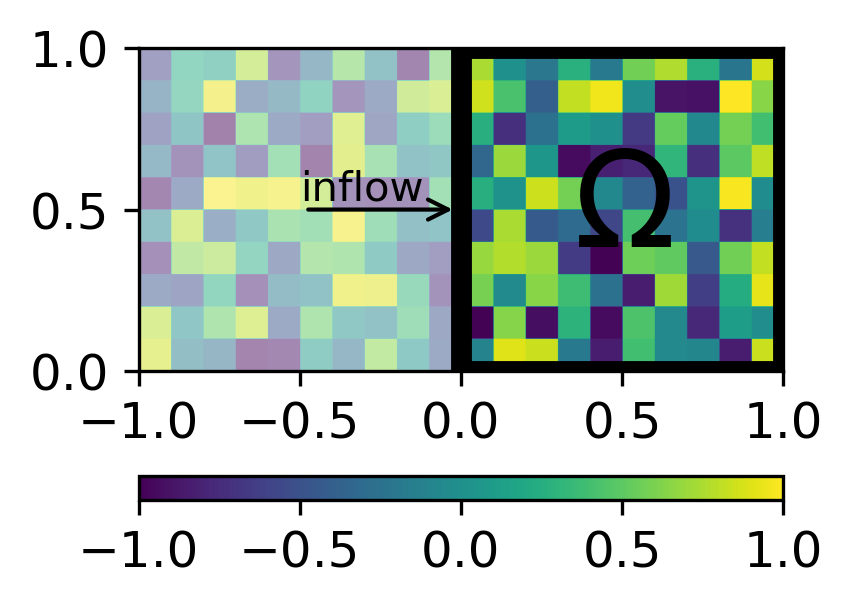

-0.95 0.05
0.8536807738774321
0.8536807738774321


(500, 1000)

In [7]:
def make_random_IC(s=20):
    xe = np.linspace(-1, 1, s+1)
    xm = (xe[1:]+xe[:-1])/2
    steps = np.random.rand(s,)*2-1


    interp  = rgi([xm, ], steps, method="nearest", bounds_error=False, fill_value=None)
    xe = np.linspace(-1, 1, 2*m+1)
    xi = (xe[1:]+xe[:-1])/2
    y = interp(xi)
    
    plot_f(y)
    #plt.plot(xm, steps, "ro")
    plt.show()

    return y

def make_random_IC_2D(nx=20, ny=10):
    xe = np.linspace(-1, 1, nx+1)
    xm = (xe[1:]+xe[:-1])/2
    ye = np.linspace(0, 1, ny+1)
    ym = (ye[1:]+ye[:-1])/2
    Xm, Ym = np.meshgrid(xm, ym, indexing="ij")
    steps = np.random.rand(nx, ny)*2-1
    print(Xm.shape, Ym.shape)
    print(steps.shape)
    print()

    interp  = rgi([xm, ym], steps, method="nearest", bounds_error=False, fill_value=None)
    xe = np.linspace(-1, 1, 2*m1+1)
    xi = (xe[1:]+xe[:-1])/2
    ye = np.linspace(0, 1, m2+1)
    yi = (ye[1:]+ye[:-1])/2

    #Xi, Yi = np.meshgrid(xi, yi, indexing="xy")
    #pts = np.c_[Xi.ravel(), Yi.ravel()]
    #y = interp(pts).reshape(m, 2*m)

    #Xi, Yi = np.meshgrid(xi, yi, indexing="ij")
    #pts = np.c_[Xi.ravel(), Yi.ravel()]
    #y = interp(pts).reshape(2*m, m).T

    Yi, Xi = np.meshgrid(yi, xi, indexing="ij")
    pts = np.c_[Xi.ravel(), Yi.ravel()]
    y = interp(pts).reshape(m1, 2*m2)

    plot_f_2D(y)
    #fig, ax = plt.subplots()
    #plt.scatter(Xm, Ym, c=steps, vmin=-1, vmax=1, zorder=2, edgecolors='black')
    plt.show()
    print(xm[0], ym[0])
    print(steps[0, 0])
    print(y[0, 0])
    
    return y

if dim == 1:
    f = make_random_IC()
if dim == 2:
    f = make_random_IC_2D()
f.shape


In [8]:
if dim == 1:
    X = np.zeros((m, n))
    for j in range(n):
        X[:, j] = f[(m-j):(m-j+m)]
    #plt.imshow(X, interpolation="nearest")
if dim == 2:
    X = np.zeros((m1*m2, n))
    for j in range(n):
        X[:, j] = f[:, (m2-j):(m2-j+m2)].ravel()
    #plt.imshow(X, interpolation="nearest")
print(X.shape)

(250000, 500)


(500, 1000)
False
True
(500, 1000)
False
True
(500, 1000)
False
True
(500, 1000)
False
True
(500, 1000)
False
True


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(500, 1000)


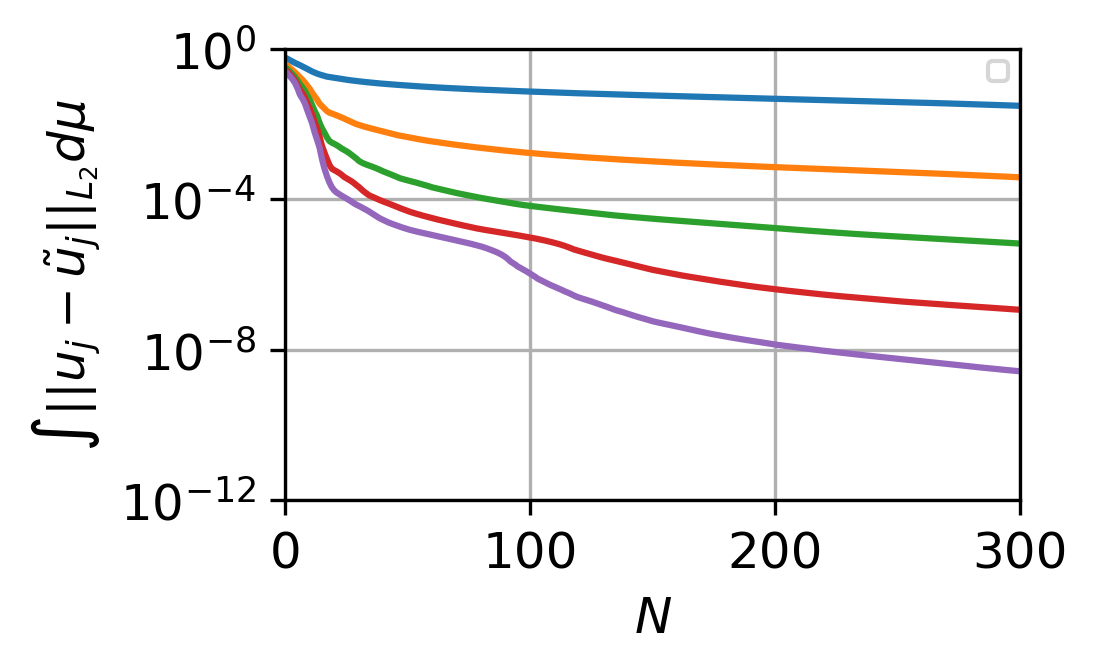

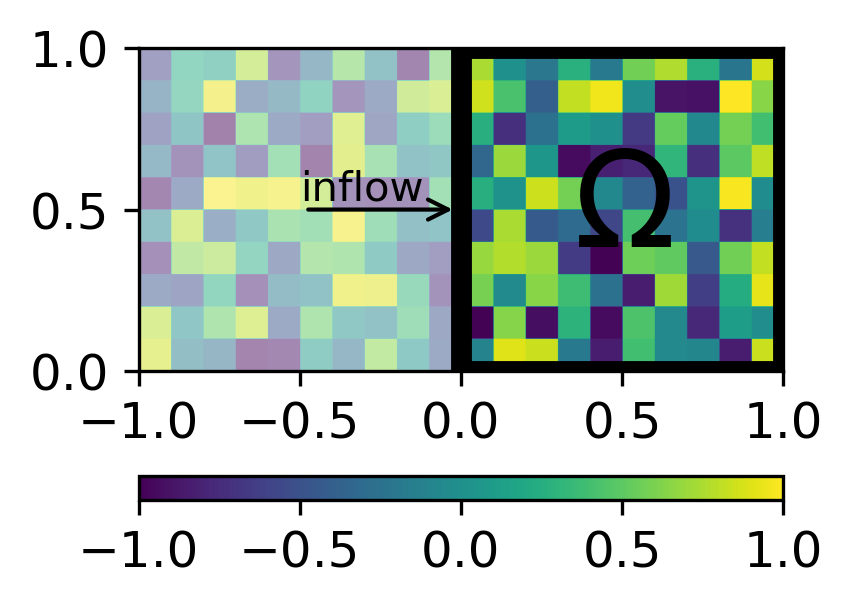

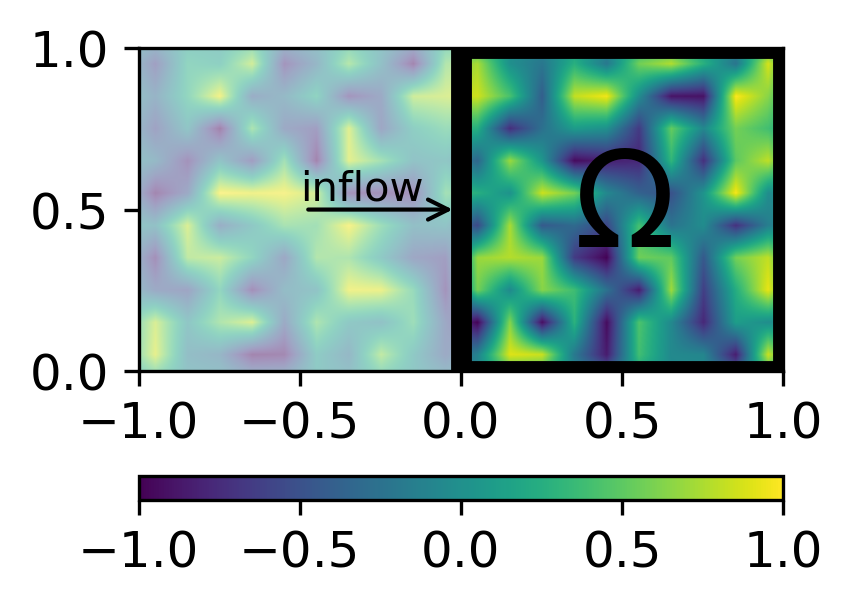

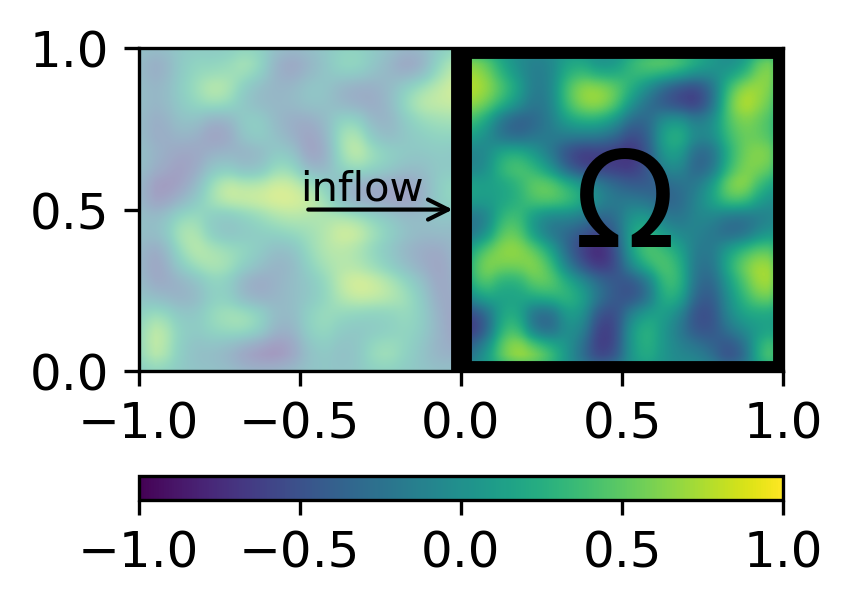

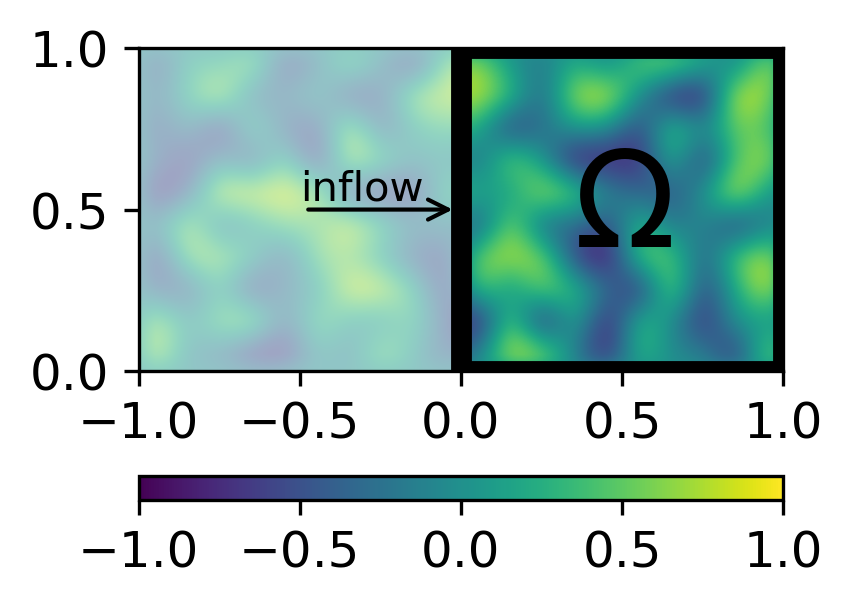

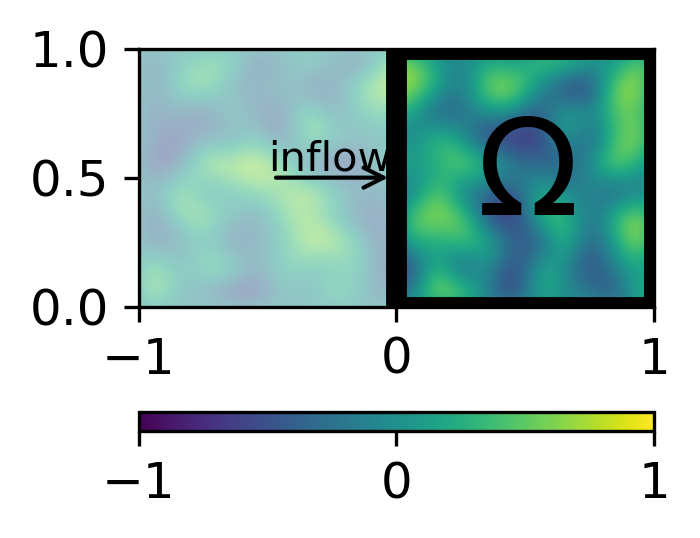

In [9]:
fk = f.copy()
print(fk.shape)
results = []
fig, ax = plt.subplots()
if dim == 1:
    kernel_width = (m*10) // 100  # 1%
    kernel = np.ones(kernel_width) / kernel_width
if dim == 2:
    w = (m1*10) // 100  # 1%
    h = (m2*10) // 100  # 1%
    kernel = np.ones((h, w)) / (w*h)
for k in range(5):
    

    #Xk = np.zeros((m, n))
    #for j in range(n):
    #    Xk[:, j] = fk[(m-j):(m-j+m)]
    if dim == 1:
        plot_f(fk)
        Xk = np.zeros((m, n))
        for j in range(n):
            Xk[:, j] = fk[(m-j):(m-j+m)]
    if dim == 2:
        plot_f_2D(fk)
        Xk = np.zeros((m1*m2, n))
        for j in range(n):
            Xk[:, j] = fk[:, (m2-j):(m2-j+m2)].ravel()
        
    svd_basis = SVD(Xk)
    delta_n, d_n = svd_basis.calc_error(Xk, r)
    results.append(delta_n)
    ax.plot(delta_n)

    #fig, axx = plt.subplots()
    #axx.imshow(Xk, interpolation="nearest")
    print(fk.shape)
    if dim == 1:
        fk = np.convolve(fk, kernel, 'same')
    if dim == 2:
        fk = scipy.signal.convolve2d(fk, kernel, 'same')
    
ax.set_ylim([1e-12, 1e+0])
ax.set_xlim([0, r]) 
ax.set_yscale('log')
ax.legend(prop={'size': 6})
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$\int || u_j - \tilde{u}_j ||_{L_2} d\mu$')
ax.grid(which="both")
plt.tight_layout()
plt.show()

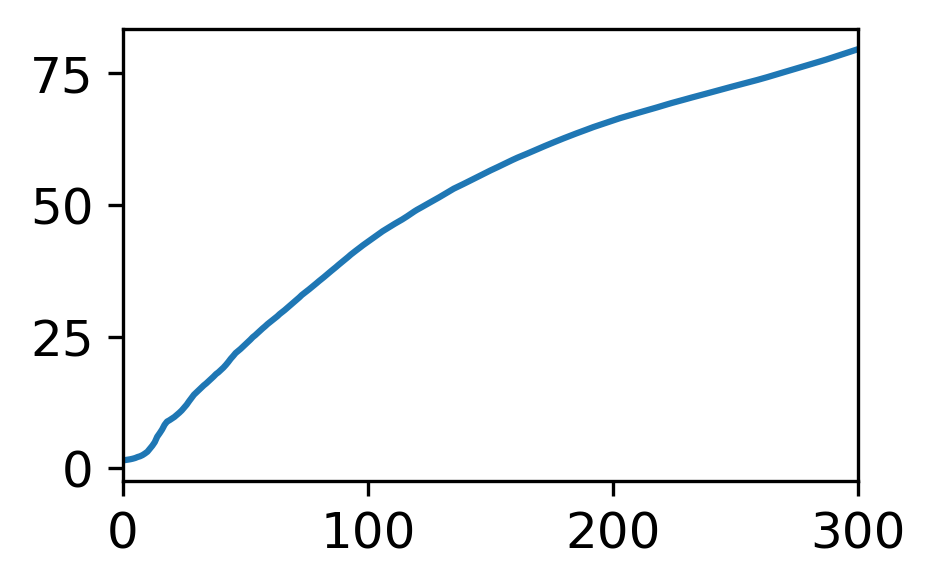

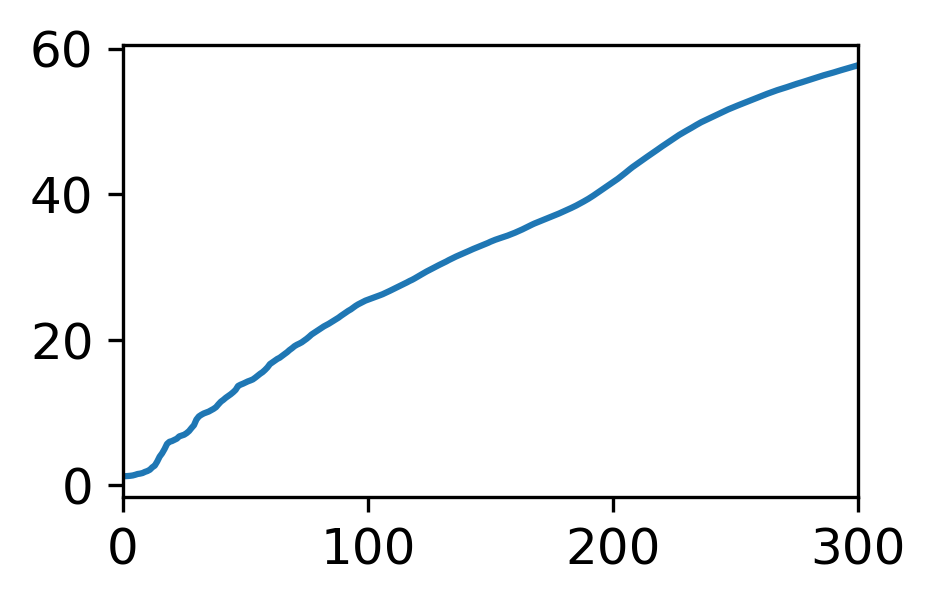

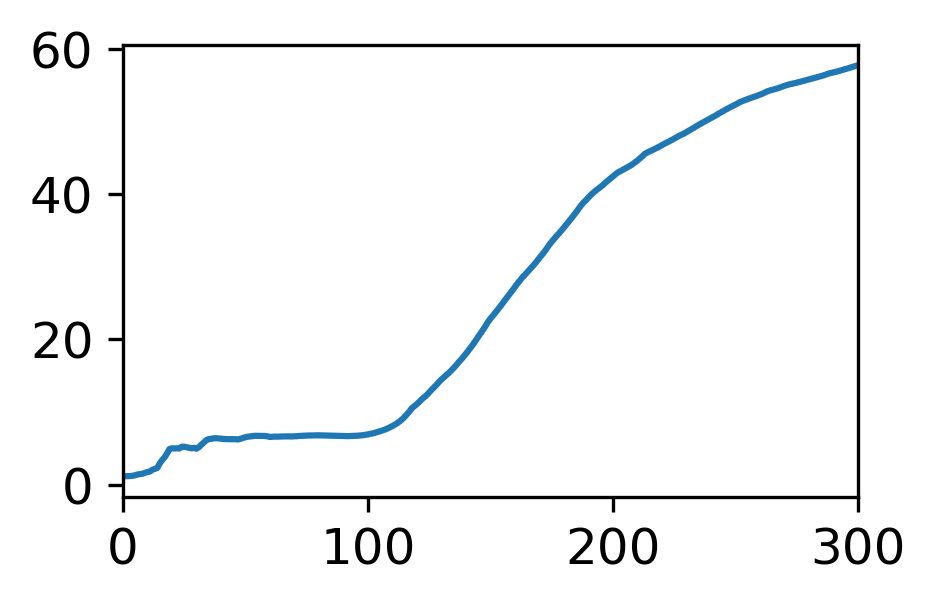

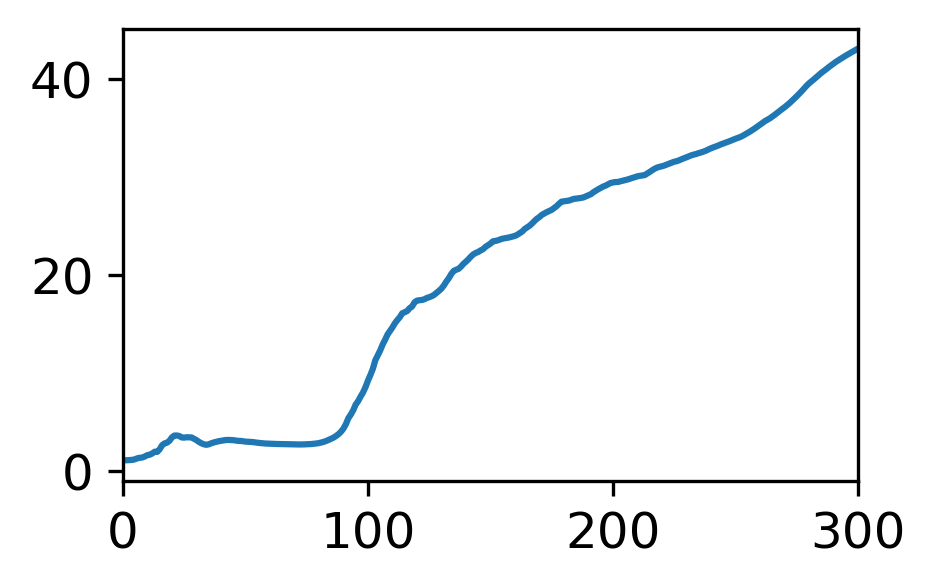

In [10]:
for i in range(4):
    fig, ax = plt.subplots()
    plt.plot((results[i]/results[i+1]))
    plt.xlim(0, r)
#    plt.ylim(0, 500)
    plt.show()


NameError: name 'm' is not defined

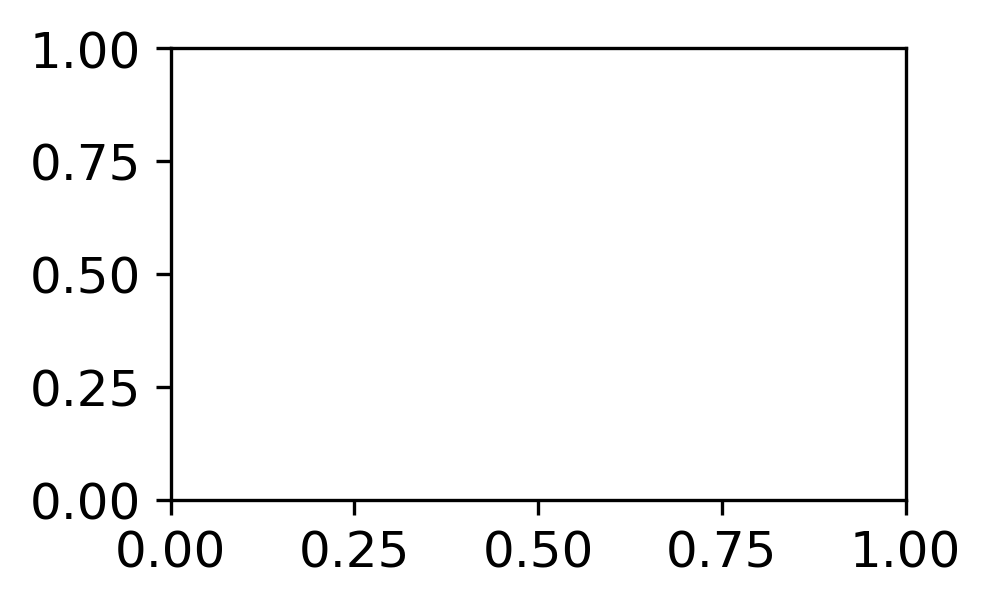

In [11]:
fig, ax = plt.subplots()
for i in range(6):
    ax.plot(np.linspace(0, 1, m), svd_basis.U[:, i])
plt.show()